http://www.pytorchtutorial.com/10-minute-pytorch-1/

# 一元线性回归。
即给出一系列的点，找一条直线，使得这条直线与这些点的距离之和最小 。

In [18]:
import torch
from torch import nn, optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 给出一系列的点作为线性回归的数据，使用numpy来存储这些点

In [19]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
 
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

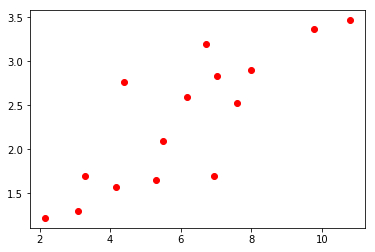

In [20]:
plt.plot(x_train, y_train, 'ro', label='Original data') #Plot默认是蓝色实线，plot里增加参数'ro'，显示变成红色圆点

In [21]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

# Linear Regression Model

### nn.Linear表示的是 y=w*x + b，里面的两个参数都是1，表示的是x是1维，y也是1维。

In [22]:

class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out


model = LinearRegression()

# 定义loss和优化函数

In [23]:
criterion = nn.MSELoss()# 损失函数：最小二乘loss（均方误差（MSE）是一种加权最小二乘，它的权值是概率）
optimizer = optim.SGD(model.parameters(), lr=1e-4)# 优化函数：随机梯度下降

# 开始训练
第一个循环表示每个epoch，接着开始前向传播，然后计算loss，然后反向传播，接着优化参数

In [36]:
num_epochs = 10000
for epoch in range(num_epochs):
    inputs = Variable(x_train)
    target = Variable(y_train)

    # forward
    out = model(inputs)# 前向传播
    loss = criterion(out, target)# 计算loss
    # backward
    optimizer.zero_grad()# 梯度归零
    loss.backward()# 反向传播
    optimizer.step()# 更新参数
    
    if (epoch+1) % 1000 == 0:
        print('Epoch[{}/{}], loss: '.format(epoch+1, num_epochs), end="")
        print(loss.item())

Epoch[1000/10000], loss: 0.1751575917005539
Epoch[2000/10000], loss: 0.17484495043754578
Epoch[3000/10000], loss: 0.1745481640100479
Epoch[4000/10000], loss: 0.1742662489414215
Epoch[5000/10000], loss: 0.17399831116199493
Epoch[6000/10000], loss: 0.17374391853809357
Epoch[7000/10000], loss: 0.1735021024942398
Epoch[8000/10000], loss: 0.17327247560024261
Epoch[9000/10000], loss: 0.17305435240268707
Epoch[10000/10000], loss: 0.1728471964597702


# 测试模型

In [37]:
model.eval()# 模型验证, model.eval()，让model变成测试模式
predict = model(x_train)
predict = predict.data.numpy()

In [38]:
predict

array([[ 1.514575  ],
       [ 1.82794535],
       [ 2.1413157 ],
       [ 2.48602319],
       [ 2.54869699],
       [ 1.76185274],
       [ 3.36032653],
       [ 2.33560538],
       [ 2.73671937],
       [ 1.19180346],
       [ 2.58060384],
       [ 3.64862728],
       [ 2.08804274],
       [ 2.85266662],
       [ 1.45759845]], dtype=float32)

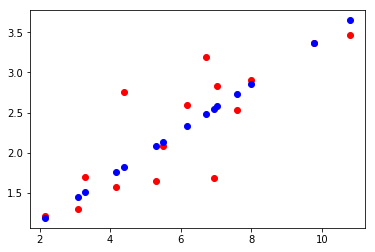

In [43]:
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data') #Plot默认是蓝色实线，plot里增加参数'ro'，显示变成红色圆点
plt.plot(x_train.numpy(), predict,'bo', label='Fitting Line')

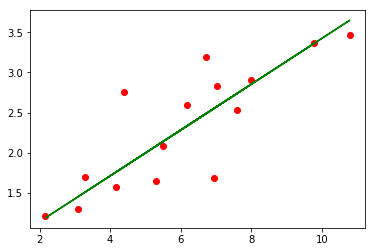

In [44]:
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data') #Plot默认是蓝色实线，plot里增加参数'ro'，显示变成红色圆点
plt.plot(x_train.numpy(), predict,'g', label='Fitting Line')

https://blog.csdn.net/qq_34447388/article/details/79467904

#-----------------------------------------------------------------------------
#---------------------------线性回归------------------------------------
#-----------------------------------------------------------------------------

In [72]:
import torch as t
from matplotlib import pyplot as plt
from IPython import display

In [73]:
t.manual_seed(1000)

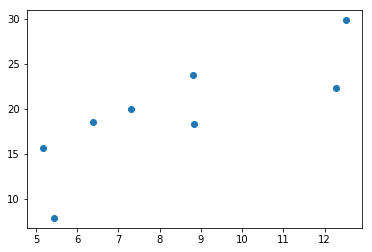

In [74]:
def get_fake_data(batch_size=8):
    x=t.rand(batch_size,1)*20
    y=x*2+(1+t.randn(batch_size,1))*3
    return x,y

x,y=get_fake_data()
plt.scatter(x.squeeze().numpy(),y.squeeze().numpy())

In [79]:
w=t.rand(1,1)
b=t.zeros(1,1)
lr=0.001

In [80]:
w

tensor([[ 0.5040]])

In [81]:
b

tensor([[ 0.]])

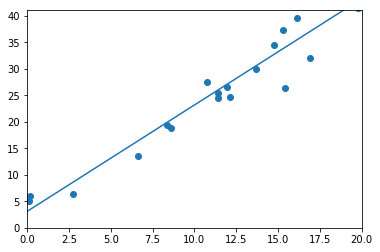

tensor(2.0073) tensor(3.0738)


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


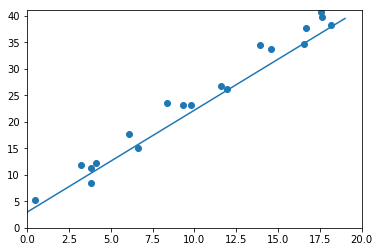

tensor(1.9235) tensor(2.9353)


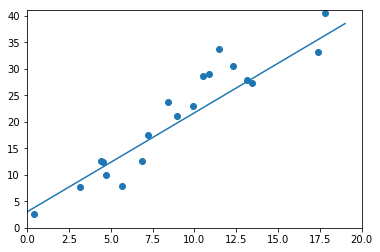

tensor(1.8688) tensor(2.9932)


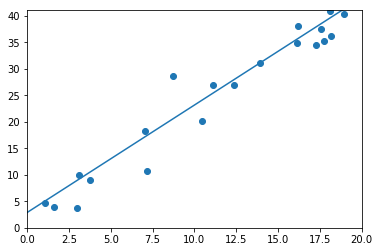

tensor(2.0273) tensor(2.8641)


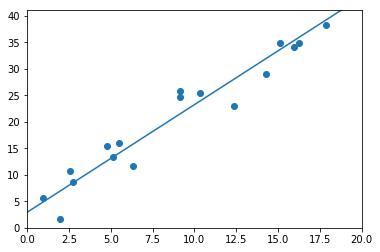

tensor(2.0309) tensor(2.9059)


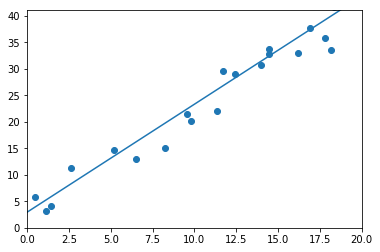

tensor(2.0368) tensor(2.9280)


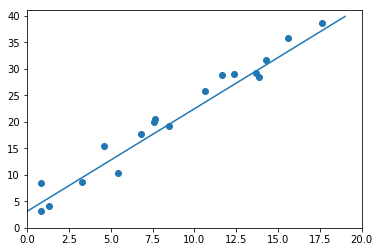

tensor(1.9348) tensor(3.0896)


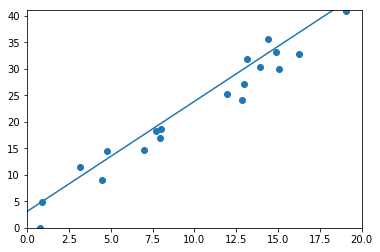

tensor(2.0769) tensor(3.0657)


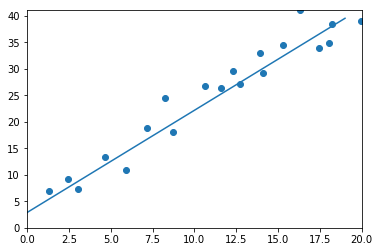

tensor(1.9282) tensor(2.8690)


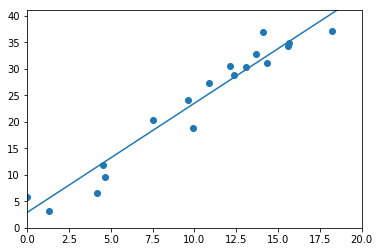

tensor(2.0607) tensor(2.8705)


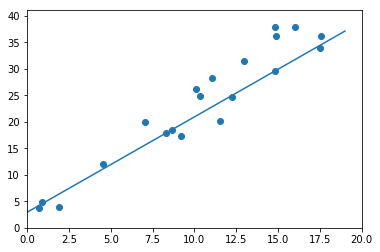

tensor(1.7989) tensor(2.9179)


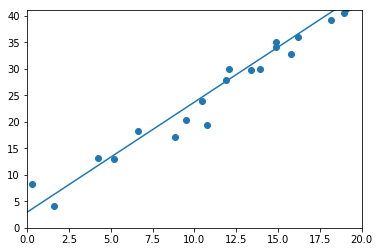

tensor(2.0763) tensor(2.9304)


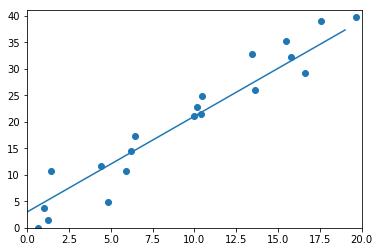

tensor(1.8066) tensor(2.9705)


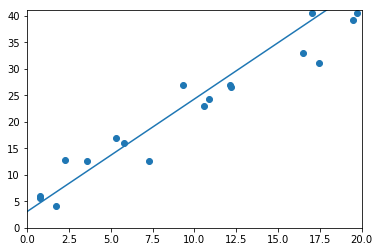

tensor(2.1240) tensor(3.0431)


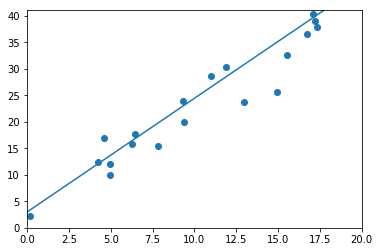

tensor(2.1446) tensor(2.9663)


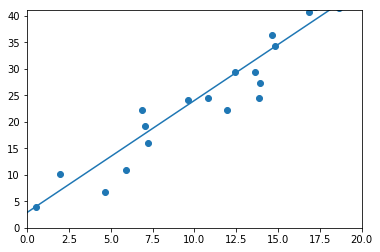

tensor(2.1125) tensor(2.8754)


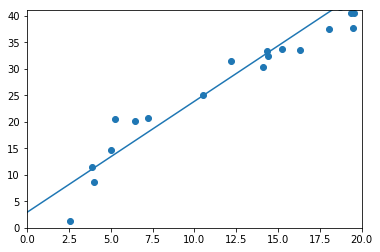

tensor(2.0936) tensor(2.9110)


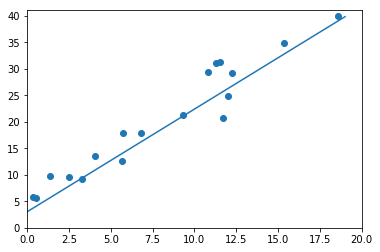

tensor(1.9372) tensor(3.0002)


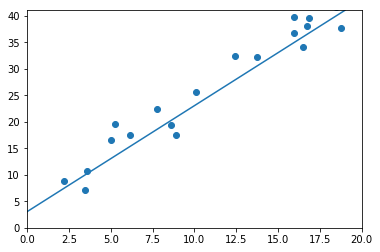

tensor(1.9995) tensor(3.0273)


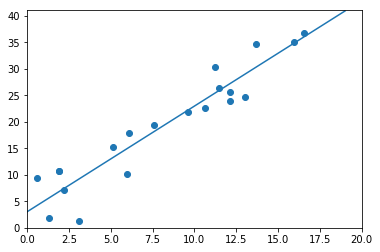

tensor(1.9937) tensor(3.0051)


In [86]:
for ii in range(20000):
    x,y=get_fake_data()
    
    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5 * (y_pred-y)**2
    loss = loss.sum()
    
    dloss = 1
    dy_pred = dloss * (y_pred - y)
    
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()
    
    w.sub_(lr*dw)
    b.sub_(lr*db)
    
    if ii%1000 == 0:
        
        #display.clear_output(wait=True)
        x=t.arange(0,20).view(-1,1)
        y=x.mm(w)+b.expand_as(x)
        plt.plot(x.numpy(),y.numpy())
        
        x2,y2=get_fake_data(batch_size=20)
        plt.scatter(x2.numpy(),y2.numpy())
        
        plt.xlim(0,20)
        plt.ylim(0,41)
        plt.show()
        plt.pause(0.5)
        
        print(w.squeeze()[0],b.squeeze()[0])

In [84]:
w

tensor([[ 2.0075]])

In [85]:
b

tensor([[ 3.0740]])